# Lab 2: Thermistor

The purpose of this lab is to measure the temperature of two "coffee" (boiling water) cups over time as "milk" (ice water) is added to it. 

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

### Raw Data

The data was collected by putting a thermistor in a voltage divider circuit. The output voltage was collected and read by using the oscilloscope function of the Analog Discovery.

`(insert circuit diagram)`

After the lab was completed, the total volume of water in each cup was measured. This includes the 40 mL of water that was added during the lab.

In [2]:
# Read Raw Data

raw_data_filename = 'thermistor_data.csv'
data = pd.read_csv(raw_data_filename)

# Configuration Data
v_in = 5  # V
r_1 = 1000  # Ohms

# Volume data
# Total volume was measured at the end of the lab, after one
# "unit" of ice water was added to each cup.
c1_total_volume = 188  # mL
c2_total_volume = 191  # mL
ice_volume = 40  # mL

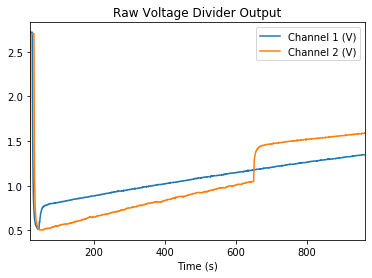

In [3]:
# Plot voltage vs time
data.plot(x='Time (s)', y=['Channel 1 (V)', 'Channel 2 (V)'], title='Raw Voltage Divider Output')

### Calculate thermistor resistance

The thermistor resistance can be defined as a function of $R_1$ and $V_{out}$ by using the voltage divider equation.

$$ V_{out} = V_{in} \times {R_{therm} \over {R_1 + R_{therm}}} \\
R_{therm} = {V_{out} \times R_1 \over {V_{in} - V_{out}}} $$

In [20]:
r_therm_1 = data['Channel 1 (V)'] * r_1 / (v_in - data['Channel 1 (V)'])
r_therm_2 = data['Channel 2 (V)'] * r_1 / (v_in - data['Channel 2 (V)'])

data['Therm Res 1 (Ohms)'] = r_therm_1
data['Therm Res 2 (Ohms)'] = r_therm_2

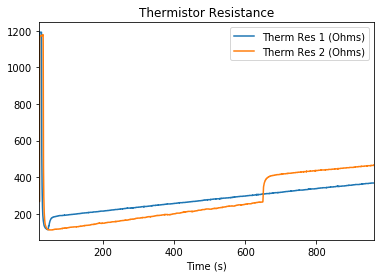

In [5]:
# Plot resistance vs time
data.plot(x='Time (s)', y=['Therm Res 1 (Ohms)', 'Therm Res 2 (Ohms)'], title='Thermistor Resistance')


### Calculate temperature

The thermistor has a defined resistance as:

$$ R = 1000 \Omega \times e ^ {-3528 {({1 \over 298} - {1 \over T})}} \\
T = {1 \over {{1 \over 298} + {{ln({R \over 1000})} \over 3528}}} $$

In [6]:
temp_therm_1_k = 1/(1/298 + (np.log(data['Therm Res 1 (Ohms)'] / 1000)) / 3528)
temp_therm_2_k = 1/(1/298 + (np.log(data['Therm Res 2 (Ohms)'] / 1000)) / 3528)

data['Therm Temp 1 (K)'] = temp_therm_1_k
data['Therm Temp 2 (K)'] = temp_therm_2_k

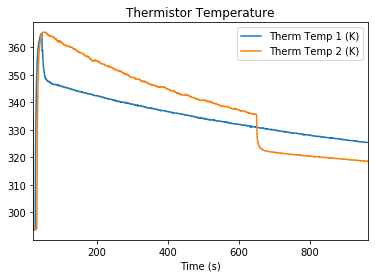

In [7]:
# Plot temperature vs time
data.plot(x='Time (s)', y=['Therm Temp 1 (K)', 'Therm Temp 2 (K)'], title='Thermistor Temperature')

In [19]:
# Convert to celcius
temp_therm_1_c = temp_therm_1_k - 273.15
temp_therm_2_c = temp_therm_2_k - 273.15

data['Therm Temp 1 (C)'] = temp_therm_1_c
data['Therm Temp 2 (C)'] = temp_therm_2_c

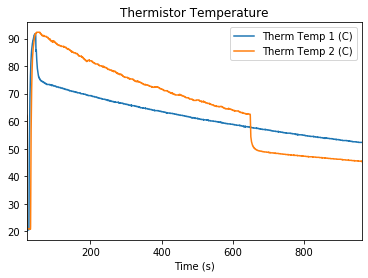

In [11]:
# Plot temperature vs time
data.plot(x='Time (s)', y=['Therm Temp 1 (C)', 'Therm Temp 2 (C)'], title='Thermistor Temperature')

### Characterizing heat loss over time

Because heat loss is a linear time invariant system, it can be modeled as an exponential decay function, which approaches room temperature, which we are assuming to be $ 22 ^\circ C $.  

$$ T(t) = T_0 + T_1 e ^ {-t\over\tau} $$

Where $\tau$ is the time constant. $\tau$ needs to be tuned to adjust the data gathered, but then can be used to extrapolate the heat loss over more time.

In [55]:
def gen_heat_loss(times, tau, t_0=22, t_1=75-22):
    output = pd.Series(np.zeros(len(times)), times)
    for i in times:
        output[i] = t_0 + t_1 * np.exp(-(i - times[0]) / tau)
    
    return output

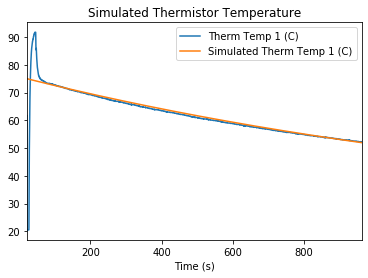

In [66]:
heat_loss = gen_heat_loss(data['Time (s)'], 1650)
data['Simulated Therm Temp 1 (C)'] = heat_loss.values

# Plot simulated therm 1
data.plot(x='Time (s)', y=['Therm Temp 1 (C)', 'Simulated Therm Temp 1 (C)'], title='Simulated Thermistor Temperature')